In [1]:
import pandas as pd

In [2]:
# games = pd.read_csv('NFLGamesDB_1.csv', index_col = 0)


'''
tnames = pd.read_csv('TeamNamesMap.csv')

tnames_df = pd.DataFrame(columns=['Team_Name', 'Year', 'Team_Symbol'])

for i in range(len(tnames)):
    team_name = tnames.iloc[i,0]
    begin_year = tnames.iloc[i,1]
    end_year = tnames.iloc[i,2]
    team_symbol = tnames.iloc[i,3]
    for j in range(begin_year, end_year+1):
        df_patch = pd.DataFrame({'Team_Name': [team_name], 'Year': [j], 'Team_Symbol': [team_symbol]})
        tnames_df = pd.concat([tnames_df, df_patch], ignore_index=True, axis=0)


tnames_df = tnames_df.astype({'Year':'int'})
        
tnamesV = tnames_df.copy()
tnamesH = tnames_df.copy()
tnamesV = tnamesV.rename(columns={'Team_Name': "Visitor", "Year":"Year", 'Team_Symbol': "Visitor_Symbol"})
tnamesH = tnamesH.rename(columns={'Team_Name': "Home", "Year":"Year", 'Team_Symbol': "Home_Symbol"})
games = pd.merge(games, tnamesV, on=['Visitor','Year'], how='left')
games = pd.merge(games, tnamesH, on=['Home', 'Year'], how='left')
games.head()

# games_sub = games[games['Year'] > 1991]
# start from 1992 will have attendance, thirddown, fourthdown data

# Data cleaning rules?

# attendance from 2020 games missing (possibly covid managed attendance): discuss cleaning rule?
# all weather related data (temp, windchill, relative humidity, wind) missing for non-outdoor stadiums
# are non-outdoor stadiums weather controlled, i.e., wind, and windchill = 0
# how to impute weather?
games_sub_roof = pd.get_dummies(games_sub.loc[:, "Roof"])
games_sub_surface = pd.get_dummies(games_sub.loc[:, "Surface"])
games_sub_home = pd.get_dummies(games_sub.loc[:, "Home_Symbol"])
games_sub_visitor = pd.get_dummies(games_sub.loc[:, "Visitor_Symbol"])

# merge the three dataframes column-wise
games_sub_coded = pd.concat([games_sub, 
                             games_sub_roof,
                             games_sub_surface,
                             games_sub_home,
                             games_sub_visitor], axis=1)
games_sub_coded.head()
'''

'\ntnames = pd.read_csv(\'TeamNamesMap.csv\')\n\ntnames_df = pd.DataFrame(columns=[\'Team_Name\', \'Year\', \'Team_Symbol\'])\n\nfor i in range(len(tnames)):\n    team_name = tnames.iloc[i,0]\n    begin_year = tnames.iloc[i,1]\n    end_year = tnames.iloc[i,2]\n    team_symbol = tnames.iloc[i,3]\n    for j in range(begin_year, end_year+1):\n        df_patch = pd.DataFrame({\'Team_Name\': [team_name], \'Year\': [j], \'Team_Symbol\': [team_symbol]})\n        tnames_df = pd.concat([tnames_df, df_patch], ignore_index=True, axis=0)\n\n\ntnames_df = tnames_df.astype({\'Year\':\'int\'})\n        \ntnamesV = tnames_df.copy()\ntnamesH = tnames_df.copy()\ntnamesV = tnamesV.rename(columns={\'Team_Name\': "Visitor", "Year":"Year", \'Team_Symbol\': "Visitor_Symbol"})\ntnamesH = tnamesH.rename(columns={\'Team_Name\': "Home", "Year":"Year", \'Team_Symbol\': "Home_Symbol"})\ngames = pd.merge(games, tnamesV, on=[\'Visitor\',\'Year\'], how=\'left\')\ngames = pd.merge(games, tnamesH, on=[\'Home\', \'Year\

In [3]:
games = pd.read_csv('NFLGamesDB.csv', index_col = 0)
games.head()

,Year,Week,Score Difference,Attendance,Temp,WindChill,RH,Wind,VFirstDowns,VRushAtt,...,Home_Symbol_NYG,Home_Symbol_NYJ,Home_Symbol_PHI,Home_Symbol_PIT,Home_Symbol_SDC,Home_Symbol_SEA,Home_Symbol_SFF,Home_Symbol_TBB,Home_Symbol_TEN,Home_Symbol_WAS
0,1999,1,43,73138,78,0,0.47,12,33,57,...,0,0,0,0,0,0,0,0,0,0
1,2009,6,24,67588,58,0,0.82,4,21,26,...,0,0,0,0,0,1,0,0,0,0
2,2018,17,24,63188,46,46,0.00,3,25,34,...,0,0,0,0,0,0,0,0,0,1
3,2008,13,37,60112,70,0,0.00,0,19,46,...,0,0,0,0,0,0,0,0,0,0
4,1993,1,24,63378,83,83,0.74,6,20,31,...,0,0,0,0,0,0,0,1,0,0


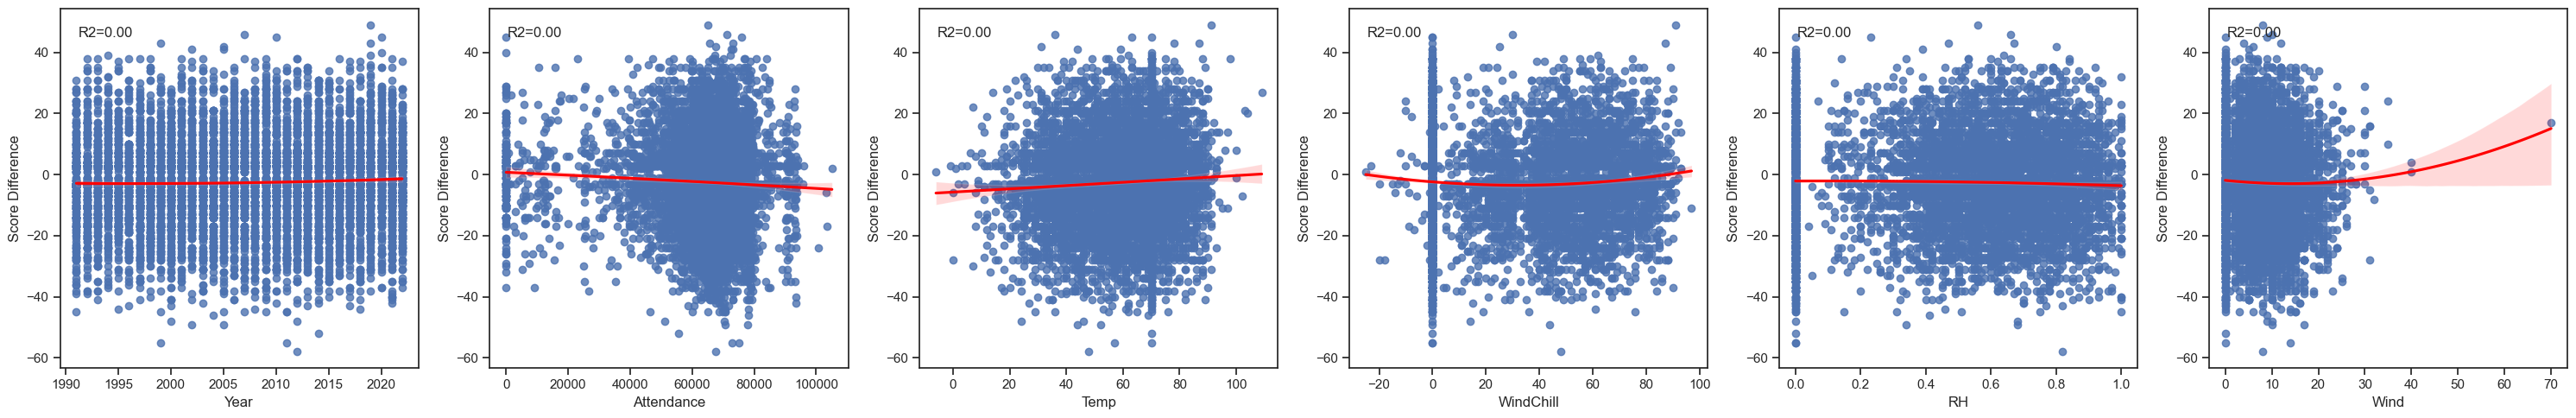

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['Year','Attendance', 'Temp', 'WindChill', 'RH', 'Wind']
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()


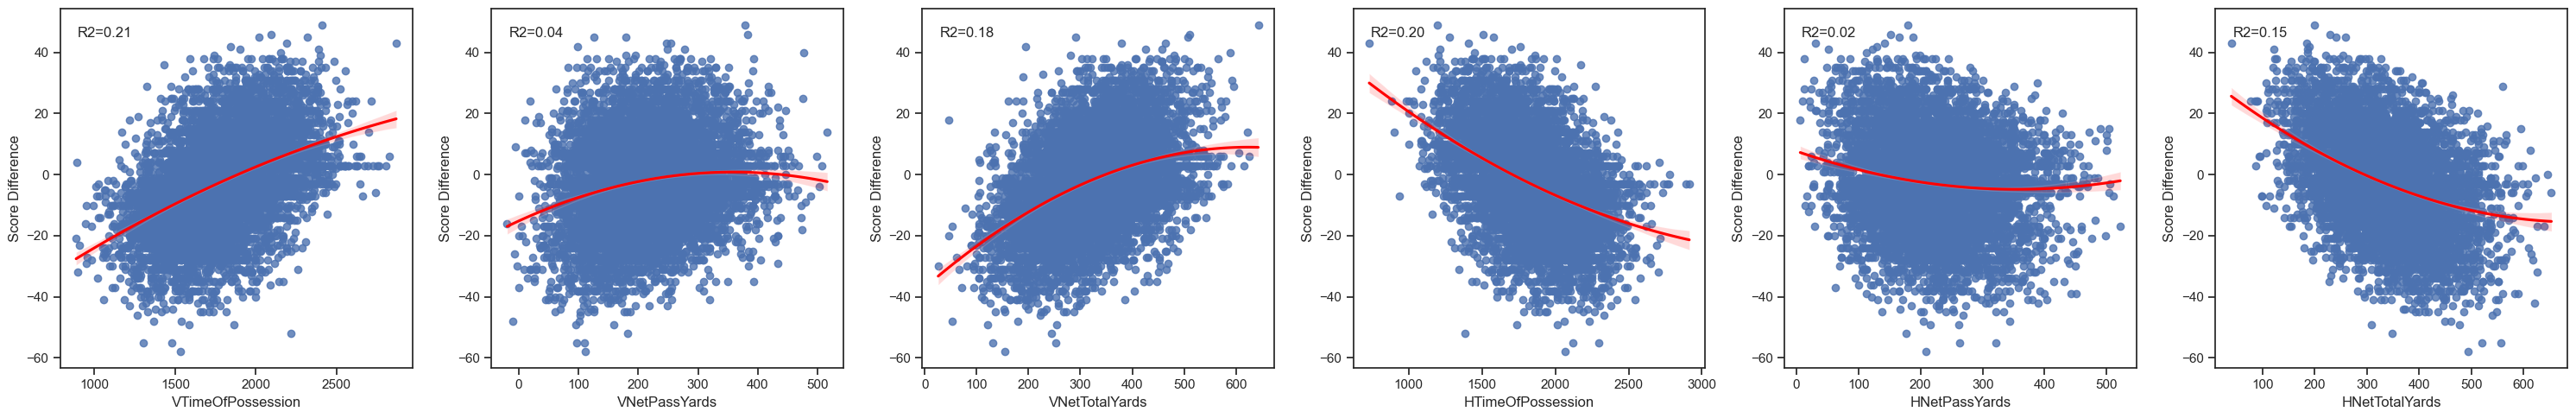

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['VTimeOfPossession','VNetPassYards','VNetTotalYards','HTimeOfPossession','HNetPassYards','HNetTotalYards',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

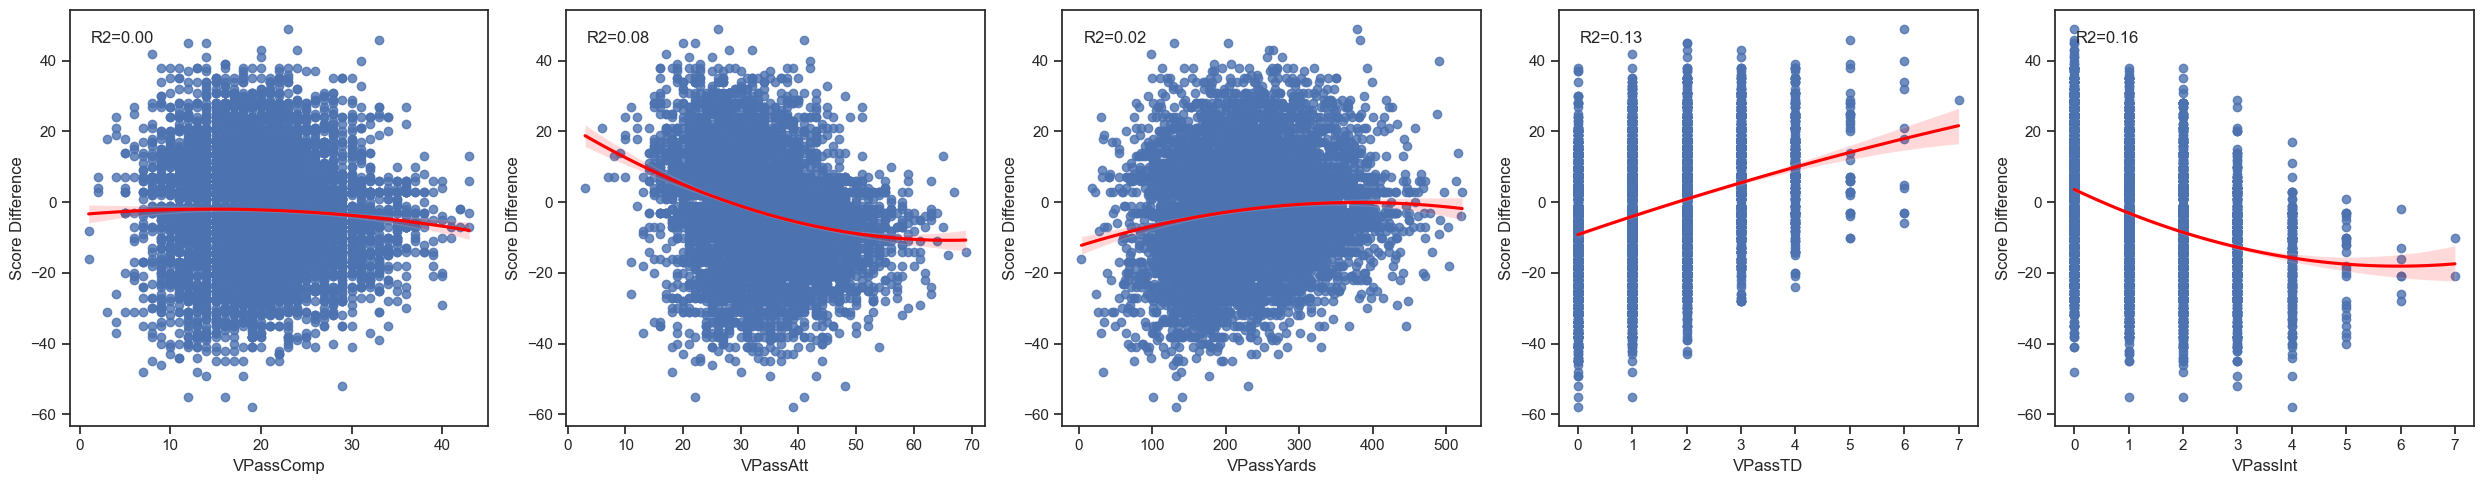

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['VPassComp','VPassAtt','VPassYards','VPassTD','VPassInt']
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

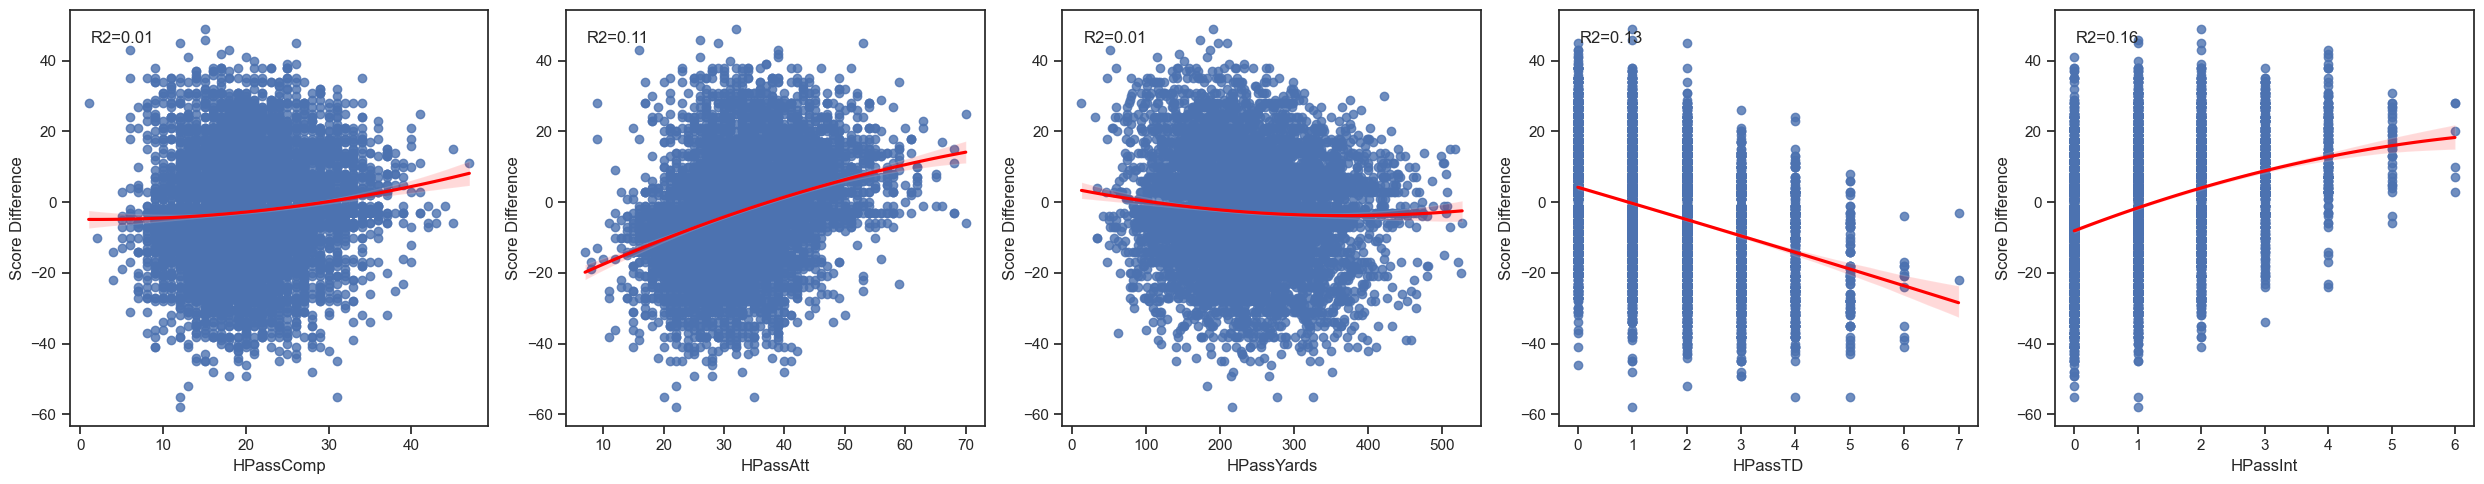

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['HPassComp','HPassAtt','HPassYards','HPassTD','HPassInt',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

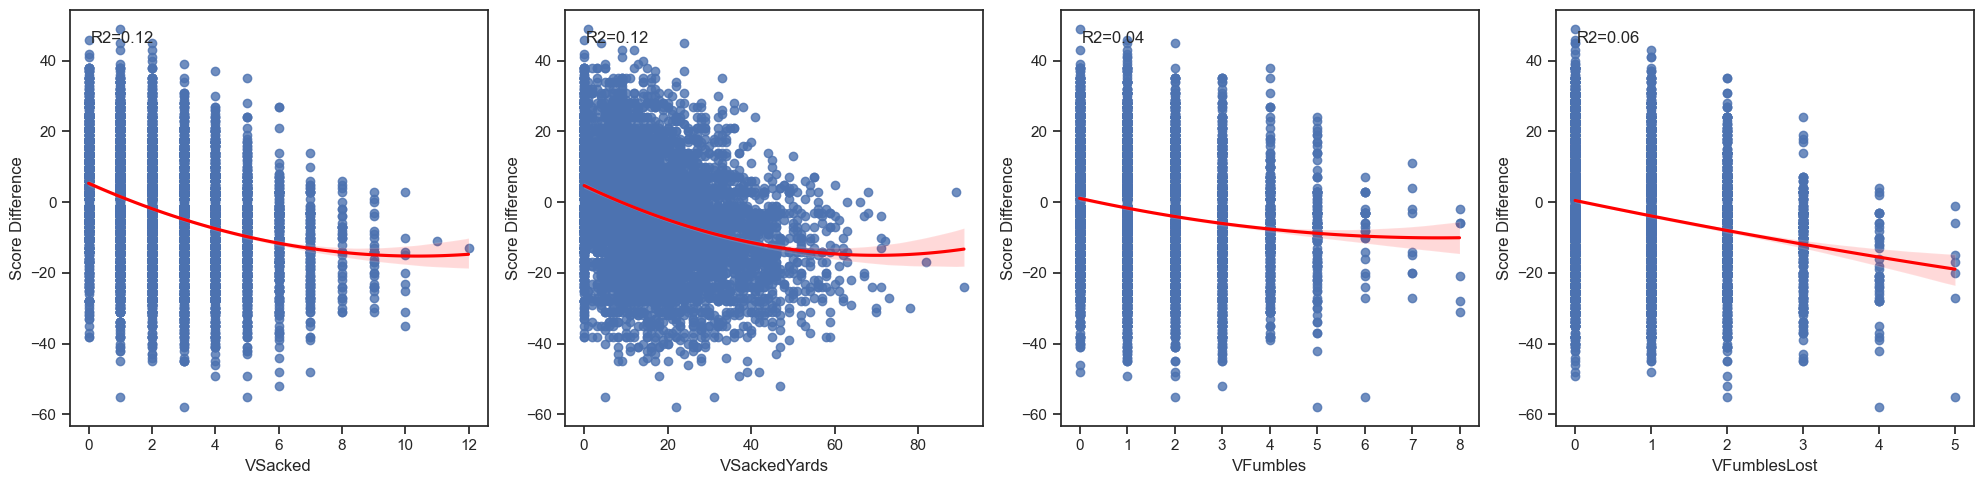

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['VSacked','VSackedYards','VFumbles','VFumblesLost']
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

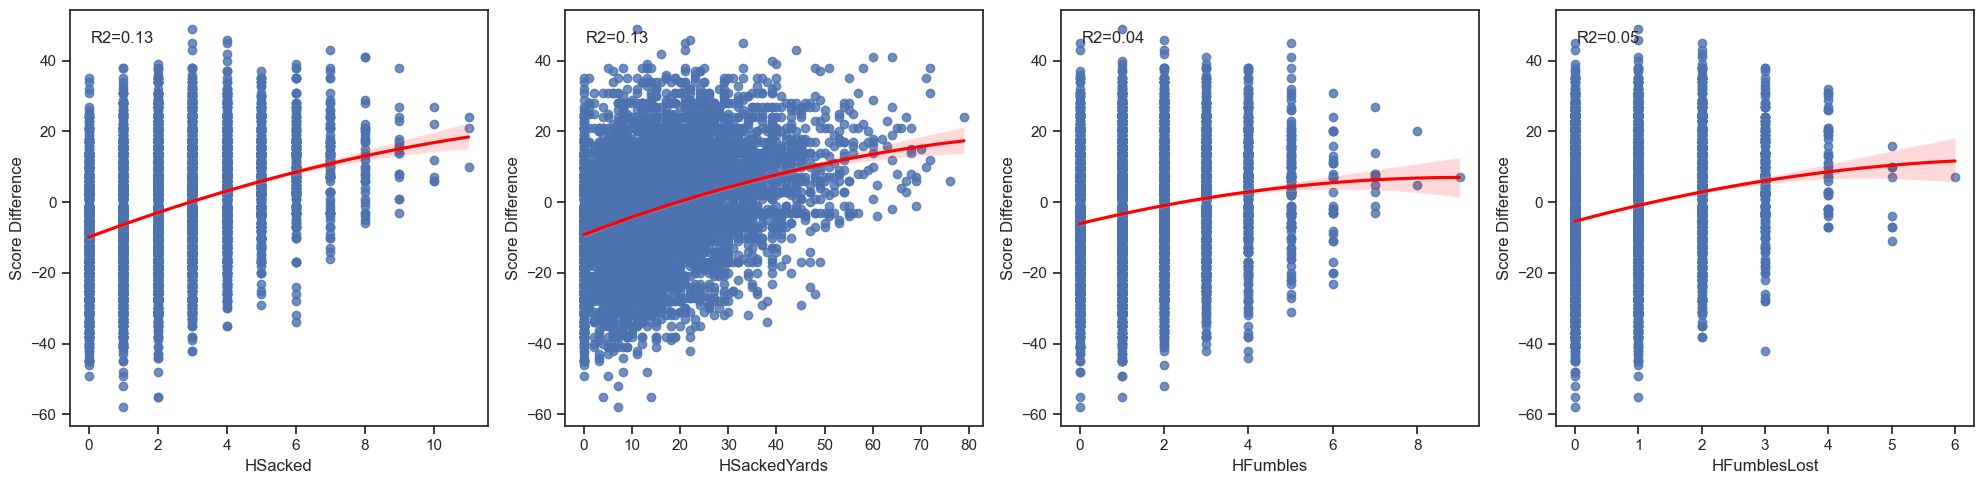

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['HSacked','HSackedYards','HFumbles','HFumblesLost',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

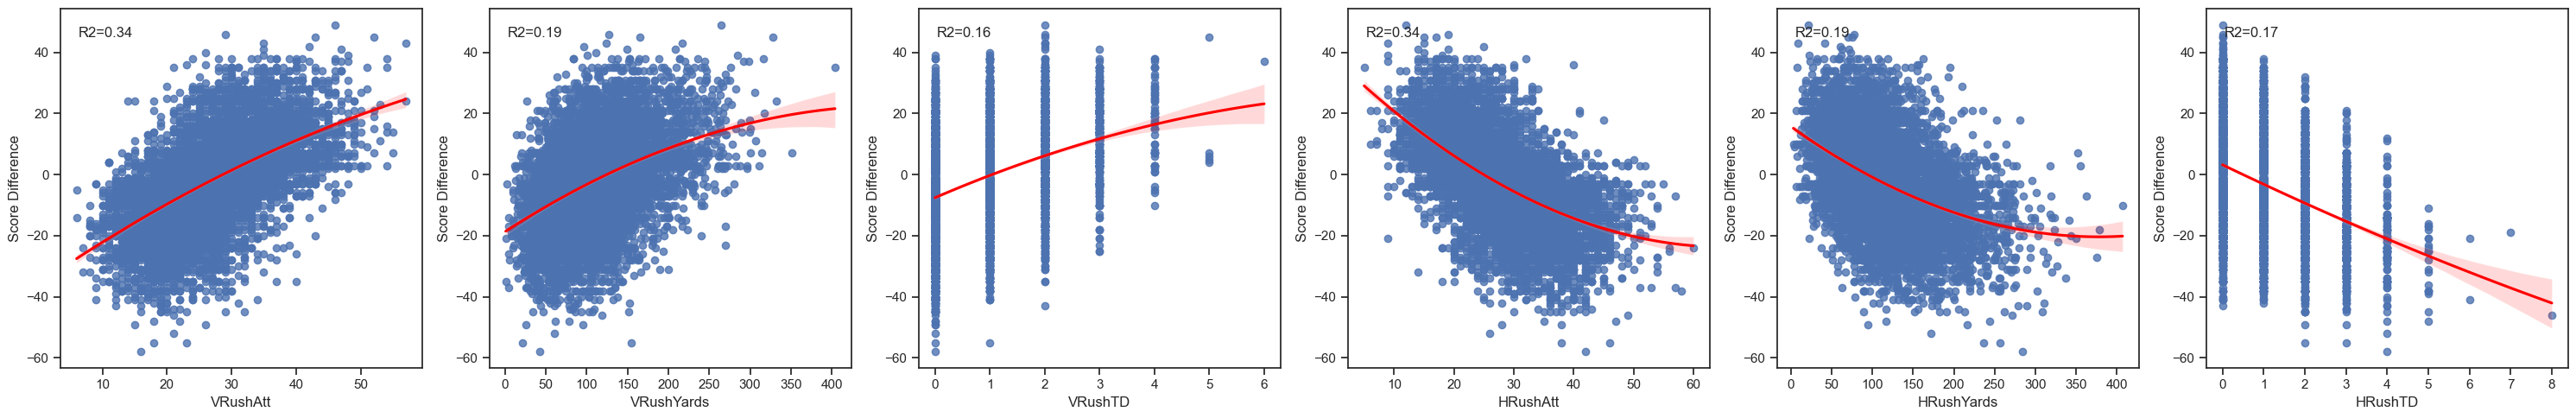

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['VRushAtt','VRushYards','VRushTD','HRushAtt','HRushYards','HRushTD',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

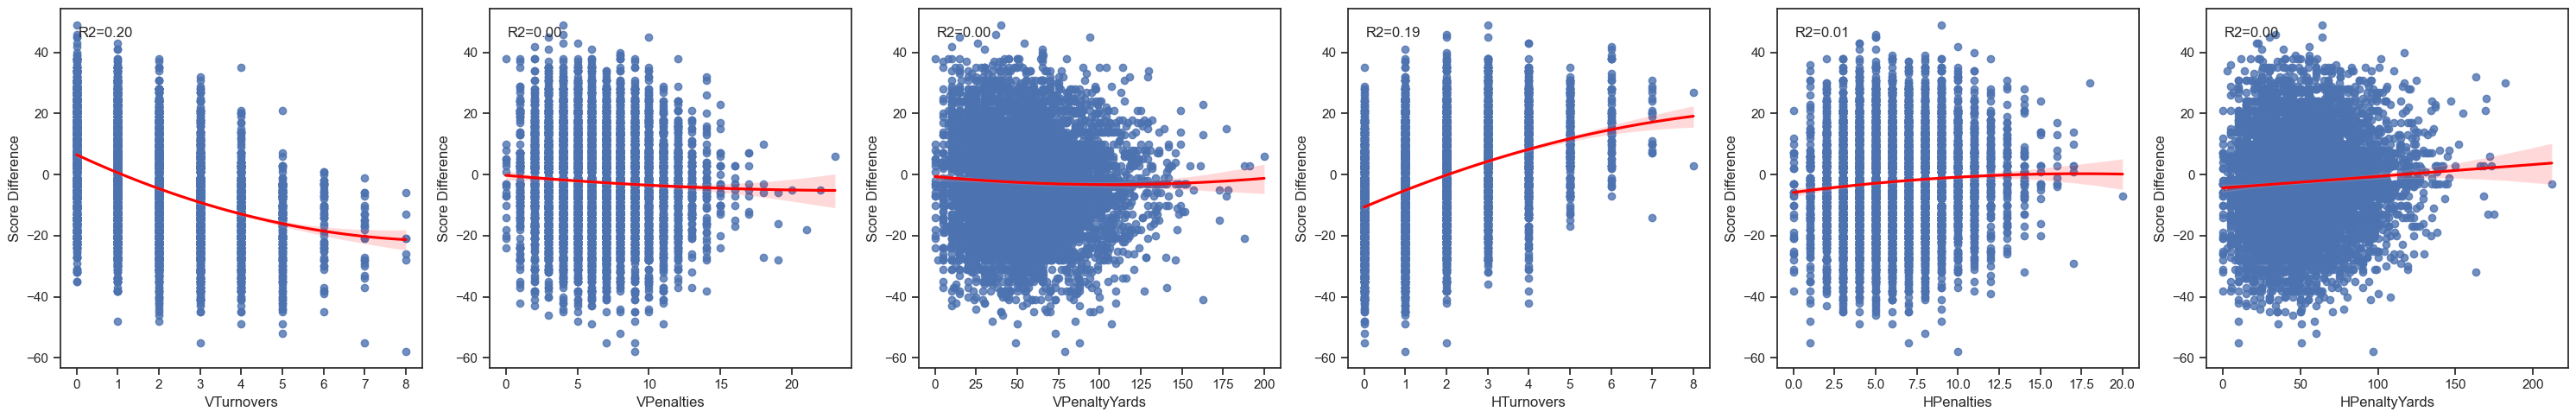

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['VTurnovers','VPenalties','VPenaltyYards','HTurnovers','HPenalties','HPenaltyYards',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

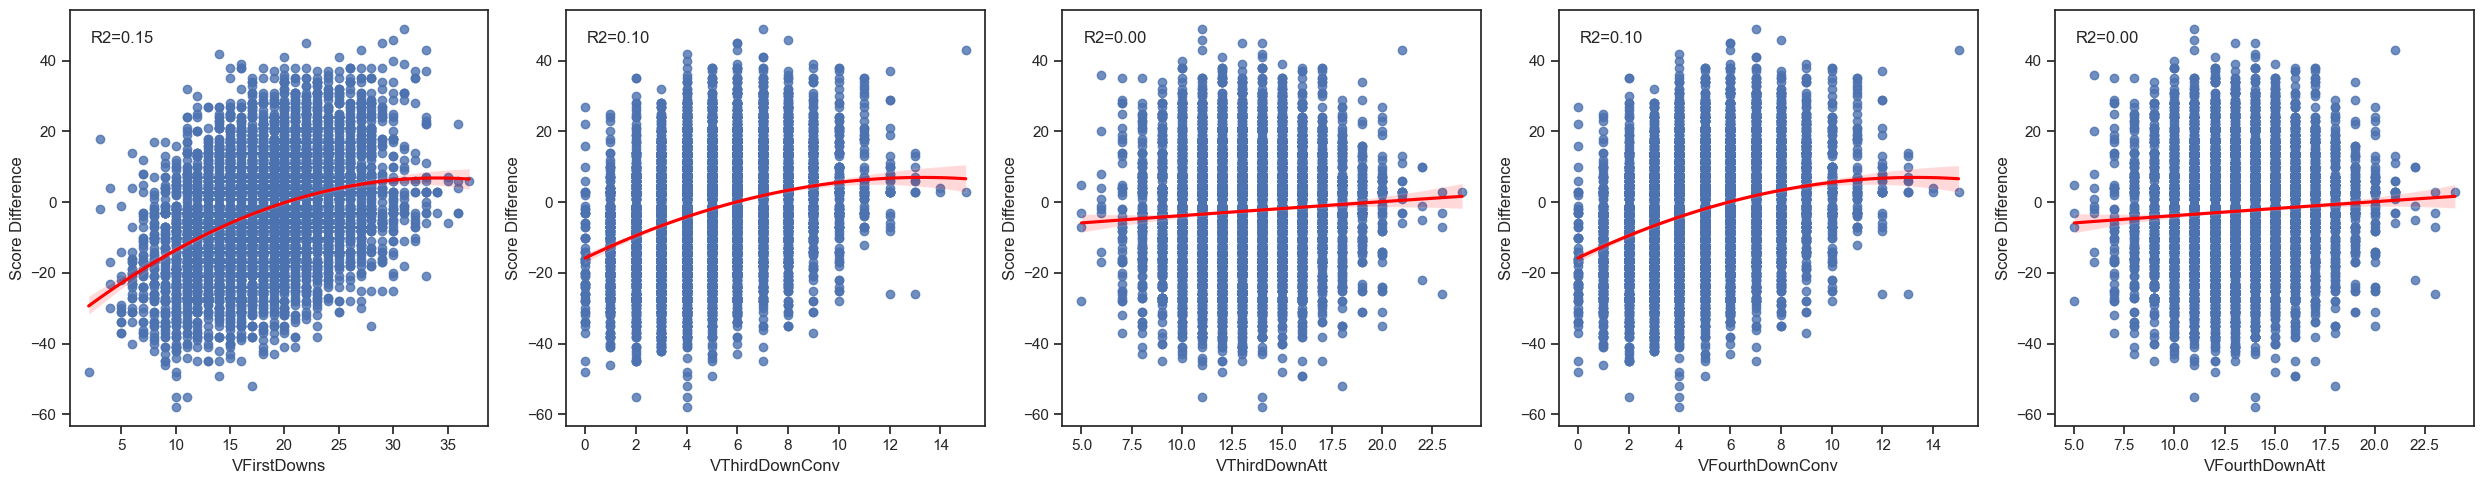

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['VFirstDowns','VThirdDownConv','VThirdDownAtt','VFourthDownConv','VFourthDownAtt',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

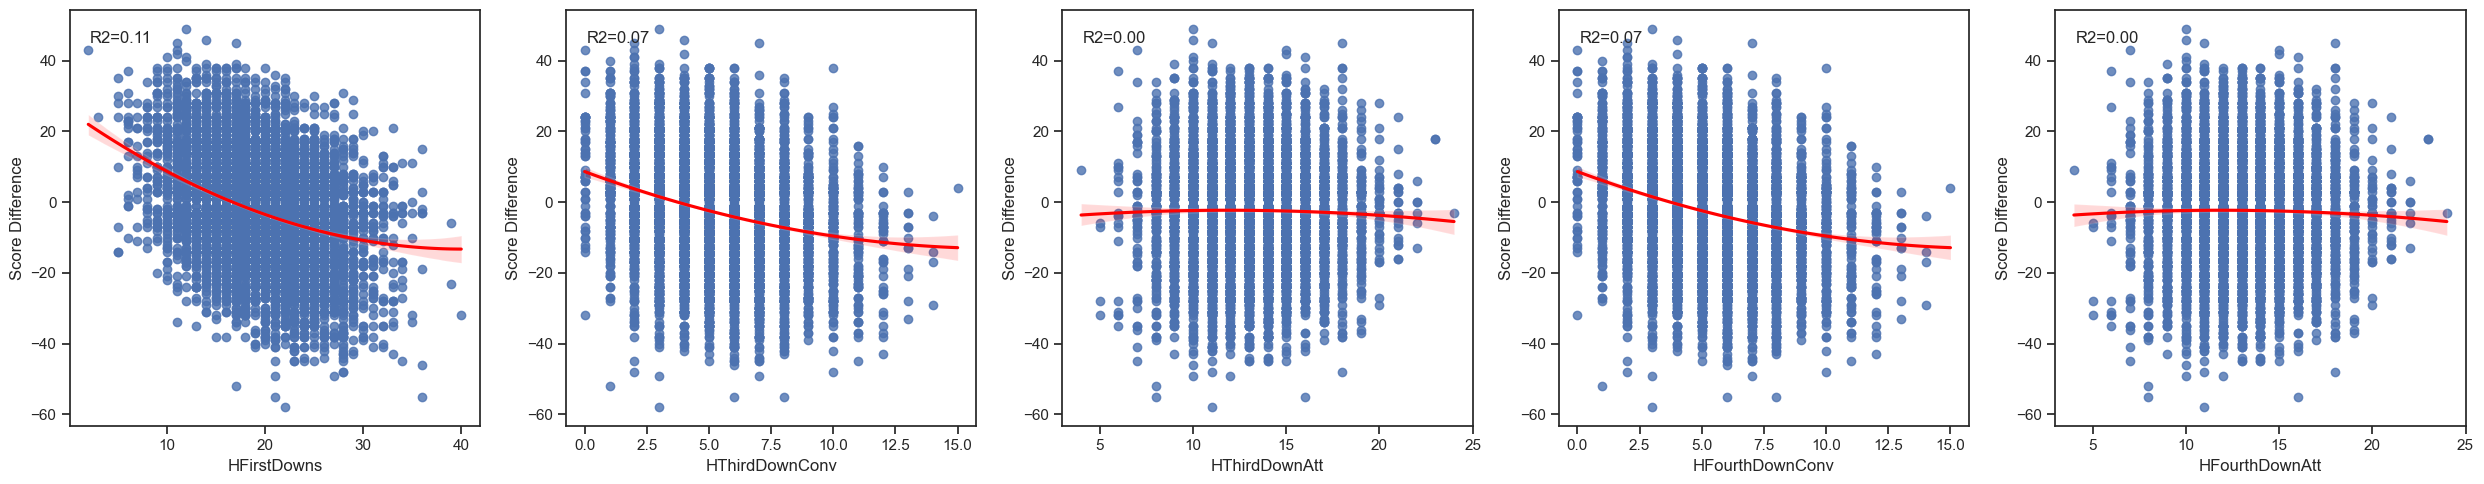

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

sns.set(style="ticks")

x_vars = ['HFirstDowns','HThirdDownConv','HThirdDownAtt','HFourthDownConv','HFourthDownAtt',]
y_var = 'Score Difference'


# Create a single row of subplots
fig, axes = plt.subplots(1, len(x_vars), figsize=(len(x_vars) * 5, 5))

# Add scatter plots with quadratic regression lines and R2 values to each subplot
for i, x_var in enumerate(x_vars):
    x_data = games[x_var]
    y_data = games[y_var]
    
    # Perform quadratic regression and calculate R2 value
    coefficients = np.polyfit(x_data, y_data, deg=2)
    poly = np.poly1d(coefficients)
    y_pred = poly(x_data)
    r_squared = r2_score(y_data, y_pred)
    
    # Plot the scatter plot and quadratic regression line with confidence intervals
    sns.regplot(x=x_data, y=y_data, ax=axes[i], order=2, ci=95, scatter=True, line_kws={"color": "red"})
    
    # Add R2 value to the plot
    axes[i].text(0.05, 0.95, "R2={:.2f}".format(r_squared),
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

plt.tight_layout()
plt.show()

In [14]:
games['VHTimeRatio'] = games['VTimeOfPossession']/games['HTimeOfPossession']
games['VNetTotalYards2'] = games['VNetTotalYards']*games['VNetTotalYards']
games['VTimeOfPossession2'] = games['VTimeOfPossession']*games['VTimeOfPossession']
games['HTimeOfPossession2'] = games['HTimeOfPossession']*games['HTimeOfPossession']
games['VPassAtt2'] = games['VPassAtt']*games['VPassAtt']
games['HPassAtt2'] = games['HPassAtt']*games['HPassAtt']
games['VSackedYards2'] = games['VSackedYards']*games['VSackedYards']
games['HSackedYards2'] = games['HSackedYards']*games['HSackedYards']
games['VTurnovers2'] = games['VTurnovers']*games['VTurnovers']
games['HTurnovers2'] = games['HTurnovers']*games['HTurnovers']
games['VRushAtt2'] = games['VRushAtt']*games['VRushAtt']
games['HRushAtt2'] = games['HRushAtt']*games['HRushAtt']
games['VRushYards2'] = games['VRushYards']*games['VRushYards']
games['HRushYards2'] = games['HRushYards']*games['HRushYards']
games['VFirstDowns2'] = games['VFirstDowns']*games['VFirstDowns']
games['HFirstDowns2'] = games['HFirstDowns']*games['HFirstDowns']

In [15]:
y = games['Score Difference']
X = games.drop(['Score Difference',
              'VQ1S', 'VQ2S', 'VQ3S', 'VQ4S', 'VOTS',
              'HQ1S', 'HQ2S', 'HQ3S', 'HQ4S', 'HOTS'], axis = 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.preprocessing import scale, MinMaxScaler 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA



# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data in the dataframe to between 0 and 1
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, 
                                                    test_size=0.2, train_size=0.8, 
                                                    random_state=123)

'''
# Perform best subset selection on the training set
models = {}
for k in range(1, X_train.shape[1] + 1):
    models[k] = []
    for subset in itertools.combinations(range(X_train.shape[1]), k):
        X_train_subset = X_train.iloc[:, list(subset)]
        # X_train_subset = sm.add_constant(X_train_subset)
        # model = sm.OLS(y_train, X_train_subset).fit()
        lin_reg = LinearRegression().fit(X_train_subset, y_train)
        y_train_pred = lin_reg.predict(X_train_subset)
        rsquared_val = r2_score(y_train, y_train_pred)
        models[k].append((lin_reg, subset, rsquared_val))

best_subsets = []

for k in models:
    best_r_squared_val = 0
    for m in models[k]:
        model_rq = m[2]
        if model_rq > best_r_squared_val:
            best_r_squared_val = model_rq
            best_subset = m[1]
    best_subsets.append(best_subset)

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=502)

# Perform cross-validation and test set
best_subset_cv_mse = []
best_subset_test_mse = []

for subset in best_subsets:
    model = LinearRegression()
    # perform 5-fold cross-validation on the model
    cv_scores = cross_val_score(model, X_train.iloc[:, list(subset)], y_train, cv=cv, scoring='neg_mean_squared_error')
    best_subset_cv_mse.append(-cv_scores.mean())

    
best_subset_cv_mse_N = best_subset_cv_mse.index(min(best_subset_cv_mse))+1
lin_reg_best_subset = LinearRegression().fit(X_test.iloc[:, list(best_subsets[best_subset_cv_mse.index(min(best_subset_cv_mse))])], y_test)
best_subset_test_mse = mean_squared_error(y_test, 
                                          lin_reg_best_subset.predict(X_test.iloc[:, list(best_subsets[best_subset_cv_mse.index(min(best_subset_cv_mse))])]), 
                                          squared=True)

'''

# Set up cross-validation
cv = KFold(n_splits=10,shuffle=True, random_state=502)

# Linear Regression
lin_reg = LinearRegression().fit(X_train, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test), squared=True)
print("(A) Full model Linear Regression Cross-validation error (MSE):", lr_score_train)
print("(A) Full model Linear Regression Test set error (MSE):", lr_score_test)
print("(A) Full model Linear Regression intercept:")
print("Intercept:", lin_reg.intercept_)
print("(A) Full model Linear Regression coefficients:")
print("Coefficients:", lin_reg.coef_)
print("(A) r_squared:", lin_reg.score(X_test, y_test))
print("(A) r_squared(train):", lin_reg.score(X_train, y_train))
'''

# Best subset Regression
print("\n(B) Best subset Linear Regression Cross-validation error (MSE):", min(best_subset_cv_mse))
print("(B) Best subset Linear Regression Predictors Indices based on CV MSE):", best_subsets[best_subset_cv_mse.index(min(best_subset_cv_mse))])  
print("(B) Best subset Linear Regression testing set error (MSE):", best_subset_test_mse)
print("(B) Best subset Linear intercept:")
print(lin_reg_best_subset.intercept_)
print("(B) Best subset Linear Regression coefficients:")
print(lin_reg_best_subset.coef_)
'''

# Ridge Regression
ridge_reg = RidgeCV(alphas=np.arange(0.01, 10, 0.01), cv=cv, scoring="neg_mean_squared_error").fit(X_train, y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean()
ridge_score_test = mean_squared_error(y_test, ridge_reg.predict(X_test), squared=True)

print('\n(C) Ridge regression alpha:', ridge_reg.alpha_)
print("(C) Ridge Regression Cross-validation error (MSE):", ridge_score_train)
print("(C) Ridge Regression test set error:", ridge_score_test)
print("(C) Ridge Regression intercept:")
print("Intercept:", ridge_reg.intercept_)
print("(C) Ridge Regression coefficients:")
print("Coefficients:", ridge_reg.coef_)
print("(C) r_squared:", ridge_reg.score(X_test, y_test))

# Lasso Regression

lasso_reg = LassoCV(alphas=None,cv=cv).fit(X_train, y_train) #sklearn choose alpha automatically
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test), squared=True)
print('\n(D) Lasso regression alpha:', lasso_reg.alpha_)
print("(D) Lasso Regression Cross-validation error (MSE):", lasso_score_train)
print("(D) Lasso Regression test set error:", lasso_score_test)
print("(D) Lasso Regression intercept:")
print("Intercept:", lasso_reg.intercept_)
print("(D) Lasso Regression coefficients:")
print("Coefficients:", lasso_reg.coef_)
print("(D) r_squared:", lasso_reg.score(X_test, y_test))

# PCR Model

print('\n(E) PCR Modelling')
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train)

# View first 5 rows of all principal components
# pd.DataFrame(pca.components_.T).loc[:4,:]

print('(E) PCR Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

lin_reg_pcr = LinearRegression()

# Create empty list to store RMSE for each iteration
pcr_mse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    pcr_mse_score = -1 * cross_val_score(lin_reg_pcr, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_mean_squared_error').mean()
    pcr_mse_list.append(pcr_mse_score)



print('(E) Minimum Cross-validation error (MSE):"', min(pcr_mse_list))
pc_N = pcr_mse_list.index(min(pcr_mse_list)) + 1
print('(E) Number of components based on minimum CV MSE:', pc_N)

# Predict on test data
X_test_pc = pca.transform(X_test)

lin_reg_pcr = LinearRegression().fit(X_train_pc[:,:pc_N], y_train)

y_test_pred = lin_reg_pcr.predict(X_test_pc[:,:pc_N])
pcr_score_test = mean_squared_error(y_test, y_test_pred, squared=True)

print("(E) PCR test set error:", pcr_score_test)
# Visual analysis - plot RMSE vs count of principal components used
# not showing as we just need the minimum

print("(E) PCR intercept:")
print("Intercept:", lin_reg_pcr.intercept_)
print("(E) PCR coefficients:")
print("Coefficients:", lin_reg_pcr.coef_)
print("(E) r_squared:", lin_reg_pcr.score(X_test_pc[:,:pc_N], y_test))



plt.plot(pcr_mse_list, '-o')
plt.xlabel('Number of principal components in PCR regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');


from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD

print('\n(F) Partial Least Squares (PLS) Regression:')
pls_mse_list = []

for i in np.arange(1, X_train_pc.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    pls_mse_list.append(-score)

print('(F) Minimum Cross-validation error (MSE):"', min(pls_mse_list))
pls_N = pls_mse_list.index(min(pls_mse_list)) + 1
print('(F) Number of components based on minimum CV MSE:', pls_N)
pls = PLSRegression(n_components=pls_N)
pls.fit(scale(X_train), y_train)
pls_score_test = mean_squared_error(y_test, pls.predict(scale(X_test)))
print("(F) PLS test set error:", pls_score_test)


print("(F) PLS intercept:")
print("Intercept:", pls.intercept_)
print("(F) PLS coefficients:")
print("Coefficients:", pls.coef_)
print("(F) r_squared:", pls.score(X_test, y_test))



print("/nSummary:/n")

all_test_mse_dict = {"A": lr_score_test, 
                    #"B": best_subset_test_mse,
                     "C": ridge_score_test,
                     "D":lasso_score_test,
                     "E": pcr_score_test,
                     "F": pls_score_test}

min_value_score_test = min(all_test_mse_dict.values())

min_keys_score_test = [k for k, v in all_test_mse_dict.items() if v == min_value_score_test]

print("Model with lowest test MSE:", min_keys_score_test)
print("Lowest test MSE:", min_value_score_test)

(A) Full model Linear Regression Cross-validation error (MSE): 24.171904866974558
(A) Full model Linear Regression Test set error (MSE): 26.30860547198365
(A) Full model Linear Regression intercept:
Intercept: 67551907848357.7
(A) Full model Linear Regression coefficients:
Coefficients: [ 2.27216999e-01 -2.94781323e-01 -5.71271857e-01 -5.47746367e-01
 -2.65649781e-01  8.78422571e-02 -1.02698232e+00  2.09496927e+01
 -1.27666964e+00  6.43624946e+13  1.79112504e+01  4.37079879e+00
 -3.23869376e+01  4.67872625e+13  2.09852752e+01  8.37623534e+13
 -4.29365738e+00 -8.21938396e+12  3.71212547e+13 -9.85400972e+13
  1.50814554e-01  5.98302524e+13 -9.57284038e+13 -4.45687188e-02
 -4.96020146e+00  6.22709316e+13  1.79795618e+13 -6.22709316e+13
 -1.79795618e+13  5.69307344e+00 -1.32634084e+01 -3.60556937e-02
 -2.94614220e+13 -2.45156250e+01 -3.25000000e+00  3.33447266e+01
 -1.64784778e+14 -2.30166016e+01  8.24153691e+13  3.66796875e+00
  2.53268434e+13  1.27797019e+14  4.47026031e+13  1.16796875e+

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence


In [ ]:
def remove_outliers_based_on_cooks_distance(X, y, threshold=None):
    if threshold is None:
        threshold = 4 / len(X)

    # Fit a linear regression model
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(y, X_with_constant).fit()

    # Calculate Cook's distance for each observation
    cooks_d = OLSInfluence(model).cooks_distance[0]

    # Remove observations with Cook's distance above the threshold
    mask = cooks_d <= threshold
    X_no_outliers = X[mask]
    y_no_outliers = y[mask]

    return X_no_outliers, y_no_outliers, mask



In [ ]:
X_no_outliers, y_no_outliers, mask = remove_outliers_based_on_cooks_distance(X_train, y_train)

X_with_constant = sm.add_constant(X_no_outliers)
model = sm.OLS(y_no_outliers, X_with_constant).fit()


In [ ]:
print(model.summary())


In [ ]:
# following codes referenced from 
# https://towardsdatascience.com/going-from-r-to-python-linear-regression-diagnostic-plots-144d1c4aa5a

from matplotlib import rcParams

import statsmodels.formula.api as smf 
import statsmodels.api as sm

from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

from scipy.stats import ttest_ind

results = model
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

In [ ]:
outliers_X = X_train[~mask]
outliers_X.shape

In [ ]:
# X_train = X_no_outliers
# y_train = y_no_outliers

In [ ]:
# Linear Regression
lin_reg = LinearRegression().fit(X_no_outliers, y_no_outliers)
lr_score_train = -1 * cross_val_score(lin_reg, X_no_outliers, y_no_outliers, cv=cv, scoring='neg_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test), squared=True)
print("(A) Full model Linear Regression Cross-validation error (MSE):", lr_score_train)
print("(A) Full model Linear Regression Test set error (MSE):", lr_score_test)
print("(A) Full model Linear Regression intercept:")
print("Intercept:", lin_reg.intercept_)
print("(A) Full model Linear Regression coefficients:")
print("Coefficients:", lin_reg.coef_)
print("(A) r_squared:", lin_reg.score(X_test, y_test))
print("(A) r_squared(train):", lin_reg.score(X_no_outliers, y_no_outliers))
'''

# Best subset Regression
print("\n(B) Best subset Linear Regression Cross-validation error (MSE):", min(best_subset_cv_mse))
print("(B) Best subset Linear Regression Predictors Indices based on CV MSE):", best_subsets[best_subset_cv_mse.index(min(best_subset_cv_mse))])  
print("(B) Best subset Linear Regression testing set error (MSE):", best_subset_test_mse)
print("(B) Best subset Linear intercept:")
print(lin_reg_best_subset.intercept_)
print("(B) Best subset Linear Regression coefficients:")
print(lin_reg_best_subset.coef_)
'''

# Ridge Regression
ridge_reg = RidgeCV(alphas=np.arange(0.01, 10, 0.01), cv=cv, scoring="neg_mean_squared_error").fit(X_no_outliers, y_no_outliers)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_no_outliers, y_no_outliers, cv=cv, scoring='neg_mean_squared_error').mean()
ridge_score_test = mean_squared_error(y_test, ridge_reg.predict(X_test), squared=True)

print('\n(C) Ridge regression alpha:', ridge_reg.alpha_)
print("(C) Ridge Regression Cross-validation error (MSE):", ridge_score_train)
print("(C) Ridge Regression test set error:", ridge_score_test)
print("(C) Ridge Regression intercept:")
print("Intercept:", ridge_reg.intercept_)
print("(C) Ridge Regression coefficients:")
print("Coefficients:", ridge_reg.coef_)
print("(C) r_squared:", ridge_reg.score(X_test, y_test))

# Lasso Regression

lasso_reg = LassoCV(alphas=None,cv=cv).fit(X_no_outliers, y_no_outliers) #sklearn choose alpha automatically
lasso_score_train = -1 * cross_val_score(lasso_reg, X_no_outliers, y_no_outliers, cv=cv, scoring='neg_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test), squared=True)
print('\n(D) Lasso regression alpha:', lasso_reg.alpha_)
print("(D) Lasso Regression Cross-validation error (MSE):", lasso_score_train)
print("(D) Lasso Regression test set error:", lasso_score_test)
print("(D) Lasso Regression intercept:")
print("Intercept:", lasso_reg.intercept_)
print("(D) Lasso Regression coefficients:")
print("Coefficients:", lasso_reg.coef_)
print("(D) r_squared:", lasso_reg.score(X_test, y_test))

# PCR Model

print('\n(E) PCR Modelling')
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_no_outliers_pc = pca.fit_transform(X_no_outliers)

# View first 5 rows of all principal components
# pd.DataFrame(pca.components_.T).loc[:4,:]

print('(E) PCR Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

lin_reg_pcr = LinearRegression()

# Create empty list to store RMSE for each iteration
pcr_mse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_no_outliers_pc.shape[1]+1):
    pcr_mse_score = -1 * cross_val_score(lin_reg_pcr, 
                                      X_no_outliers_pc[:,:i], # Use first k principal components
                                      y_no_outliers, 
                                      cv=cv, 
                                      scoring='neg_mean_squared_error').mean()
    pcr_mse_list.append(pcr_mse_score)



print('(E) Minimum Cross-validation error (MSE):"', min(pcr_mse_list))
pc_N = pcr_mse_list.index(min(pcr_mse_list)) + 1
print('(E) Number of components based on minimum CV MSE:', pc_N)

# Predict on test data
X_test_pc = pca.transform(X_test)

lin_reg_pcr = LinearRegression().fit(X_no_outliers_pc[:,:pc_N], y_no_outliers)

y_test_pred = lin_reg_pcr.predict(X_test_pc[:,:pc_N])
pcr_score_test = mean_squared_error(y_test, y_test_pred, squared=True)

print("(E) PCR test set error:", pcr_score_test)
# Visual analysis - plot RMSE vs count of principal components used
# not showing as we just need the minimum

print("(E) PCR intercept:")
print("Intercept:", lin_reg_pcr.intercept_)
print("(E) PCR coefficients:")
print("Coefficients:", lin_reg_pcr.coef_)
print("(E) r_squared:", lin_reg_pcr.score(X_test_pc[:,:pc_N], y_test))



plt.plot(pcr_mse_list, '-o')
plt.xlabel('Number of principal components in PCR regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_no_outliers_pc.shape[1]), np.arange(1, X_no_outliers_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');


from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD

print('\n(F) Partial Least Squares (PLS) Regression:')
pls_mse_list = []

for i in np.arange(1, X_no_outliers_pc.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_no_outliers), y_no_outliers, cv=cv, scoring='neg_mean_squared_error').mean()
    pls_mse_list.append(-score)

print('(F) Minimum Cross-validation error (MSE):"', min(pls_mse_list))
pls_N = pls_mse_list.index(min(pls_mse_list)) + 1
print('(F) Number of components based on minimum CV MSE:', pls_N)
pls = PLSRegression(n_components=pls_N)
pls.fit(scale(X_no_outliers), y_no_outliers)
pls_score_test = mean_squared_error(y_test, pls.predict(scale(X_test)))
print("(F) PLS test set error:", pls_score_test)


print("(F) PLS intercept:")
print("Intercept:", pls.intercept_)
print("(F) PLS coefficients:")
print("Coefficients:", pls.coef_)
print("(F) r_squared:", pls.score(X_test, y_test))



print("/nSummary:/n")

all_test_mse_dict = {"A": lr_score_test, 
                    #"B": best_subset_test_mse,
                     "C": ridge_score_test,
                     "D":lasso_score_test,
                     "E": pcr_score_test,
                     "F": pls_score_test}

min_value_score_test = min(all_test_mse_dict.values())

min_keys_score_test = [k for k, v in all_test_mse_dict.items() if v == min_value_score_test]

print("Model with lowest test MSE:", min_keys_score_test)
print("Lowest test MSE:", min_value_score_test)

In [ ]:
##### If in Jupyter Notebook, install a pip package in the current Jupyter kernel
##### un-comment next two lines to install

# import sys
# !{sys.executable} -m pip install m5py

In [ ]:
#X_train = X_train.to_numpy()
#y_train = y_train.to_numpy()

In [ ]:
feature_names = X_train.columns.tolist()
X_trainnp = X_train.to_numpy()
y_trainnp = y_train.to_numpy()


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text

##### use of m5py to build model tree

from m5py import M5Prime

In [ ]:
kf = KFold(n_splits=10,shuffle=True, random_state=502)

In [ ]:
regr_0 = DecisionTreeRegressor(max_depth = 8, random_state=502, min_samples_leaf = 20)
# regr_0 = DecisionTreeRegressor()
regr_0_label = "DecisionTree\n (max_depth: 4)"
# regr_0_label = "Tree 0"
regr_0_scores_r2 = cross_val_score(regr_0, X_trainnp, y_trainnp, cv = kf, 
                                   scoring = 'r2')
regr_0_scores_mse = cross_val_score(regr_0, X_trainnp, y_trainnp, cv = kf, 
                                    scoring = 'neg_mean_squared_error')
regr_0_scores_rmse = cross_val_score(regr_0, X_trainnp, y_trainnp, cv = kf, 
                                     scoring = 'neg_root_mean_squared_error')

print("RegressionTree 10-fold scores (R2):\n", regr_0_scores_r2)
print("RegressionTree 10-fold mean (R2):",regr_0_scores_r2.mean())
print('\n')
print("RegressionTree 10-fold scores (MSE):\n", -1*regr_0_scores_mse)
print("RegressionTree 10-fold mean (MSE):",-1*regr_0_scores_mse.mean())
print('\n')
print("RegressionTree 10-fold scores (RMSE):\n", -1*regr_0_scores_rmse)
print("RegressionTree 10-fold mean (RMSE):",-1*regr_0_scores_rmse.mean())

In [ ]:
regr_1 = M5Prime(use_smoothing = True, use_pruning = True,
                 max_depth=9, random_state=502)
regr_1_label = "ModelTree\n(smooth False,\n prune False,\n max depth: 4)"
# regr_1_label = "Tree 1"
regr_1_scores_r2 = cross_val_score(regr_1, X_trainnp, y_trainnp, cv = kf, 
                                   scoring = 'r2')
regr_1_scores_mse = cross_val_score(regr_1, X_trainnp, y_trainnp, cv = kf, 
                                    scoring = 'neg_mean_squared_error')
regr_1_scores_rmse = cross_val_score(regr_1, X_trainnp, y_trainnp, cv = kf, 
                                     scoring = 'neg_root_mean_squared_error')

print("M5_ModelTree (smooth=False, pruning=False) 10-fold scores (R2):\n", 
      regr_1_scores_r2)
print("M5_ModelTree (smooth=False, pruning=False) 10-fold mean(R2):",
      regr_1_scores_r2.mean())
print('\n')

print("M5_ModelTree (smooth=False, pruning=False) 10-fold scores (MSE):\n", 
      -1*regr_1_scores_mse)
print("M5_ModelTree (smooth=False, pruning=False) 10-fold mean(MSE):",
      -1*regr_1_scores_mse.mean())
print('\n')

print("M5_ModelTree (smooth=False, pruning=False) 10-fold scores (RMSE):\n", 
      -1*regr_1_scores_rmse)
print("M5_ModelTree (smooth=False, pruning=False) 10-fold mean(RMSE):",
      -1*regr_1_scores_rmse.mean())

In [ ]:
regr_2 = M5Prime(use_smoothing = True, use_pruning = True,
                 max_depth=10, random_state=502)
regr_2_label = "ModelTree\n(smooth False,\n prune True,\n max depth: 6)"
# regr_2_label = "Tree 2"

regr_2_scores_r2 = cross_val_score(regr_2, X_trainnp, y_trainnp, cv = kf, 
                                   scoring = 'r2')
regr_2_scores_mse = cross_val_score(regr_2, X_trainnp, y_trainnp, cv = kf, 
                                    scoring = 'neg_mean_squared_error')
regr_2_scores_rmse = cross_val_score(regr_2, X_trainnp, y_trainnp, cv = kf, 
                                     scoring = 'neg_root_mean_squared_error')

print("M5_ModelTree (smooth=False, pruning=True) 10-fold scores (R2):\n", 
      regr_2_scores_r2)
print("M5_ModelTree (smooth=False, pruning=True) 10-fold mean(R2):",
      regr_2_scores_r2.mean())
print('\n')

print("M5_ModelTree (smooth=False, pruning=True) 10-fold scores (MSE):\n", 
      -1*regr_2_scores_mse)
print("M5_ModelTree (smooth=False, pruning=True) 10-fold mean(MSE):",
      -1*regr_2_scores_mse.mean())
print('\n')

print("M5_ModelTree (smooth=False, pruning=True) 10-fold scores (RMSE):\n", 
      -1*regr_2_scores_rmse)
print("M5_ModelTree (smooth=False, pruning=True) 10-fold mean(RMSE):",
      -1*regr_2_scores_rmse.mean())

In [ ]:
regr_3 = M5Prime(use_smoothing = True, use_pruning = True,
                 max_depth=11, 
                 random_state=502)
regr_3_label = "ModelTree\n (smooth True,\n prune True,\n max depth: 6)"
# regr_3_label = "Tree 3"

regr_3_scores_r2 = cross_val_score(regr_3, X_trainnp, y_trainnp, cv = kf, 
                                   scoring = 'r2')
regr_3_scores_mse = cross_val_score(regr_3, X_trainnp, y_trainnp, cv = kf, 
                                    scoring = 'neg_mean_squared_error')
regr_3_scores_rmse = cross_val_score(regr_3, X_trainnp, y_trainnp, cv = kf, 
                                     scoring = 'neg_root_mean_squared_error')

print("M5_ModelTree (smooth=True, pruning=True) 10-fold scores (R2):\n", 
      regr_3_scores_r2)
print("M5_ModelTree (smooth=True, pruning=True) 10-fold mean(R2):",
      regr_3_scores_r2.mean())
print('\n')

print("M5_ModelTree (smooth=True, pruning=True) 10-fold scores (MSE):\n", 
      -1*regr_3_scores_mse)
print("M5_ModelTree (smooth=True, pruning=True) 10-fold mean(MSE):",
      -1*regr_3_scores_mse.mean())
print('\n')

print("M5_ModelTree (smooth=True, pruning=True) 10-fold scores (RMSE):\n", 
      -1*regr_3_scores_rmse)
print("M5_ModelTree (smooth=True, pruning=True) 10-fold mean(RMSE):",
      -1*regr_3_scores_rmse.mean())

In [ ]:
scores_r2 = np.c_[regr_0_scores_r2, regr_1_scores_r2, regr_2_scores_r2, regr_3_scores_r2]
avgs_r2 = scores_r2.mean(axis=0)
stds_r2 = scores_r2.std(axis=0)
labels = [regr_0_label, regr_1_label, regr_2_label, regr_3_label]

In [ ]:
import seaborn as sns
scores_r2_df = pd.DataFrame(data=scores_r2, columns=labels)
sns.violinplot(data=scores_r2_df)

In [ ]:
scores_mse = np.c_[-1*regr_0_scores_mse, -1*regr_1_scores_mse, 
                   -1*regr_2_scores_mse, -1*regr_3_scores_mse]
avgs_mse = scores_mse.mean(axis=0)
stds_mse = scores_mse.std(axis=0)
labels = [regr_0_label, regr_1_label, regr_2_label, regr_3_label]
scores_mse_df = pd.DataFrame(data=scores_mse, columns=labels)
sns.violinplot(data=scores_mse_df)

In [ ]:
scores_rmse = np.c_[-1*regr_0_scores_rmse, -1*regr_1_scores_rmse, 
                    -1*regr_2_scores_rmse, -1*regr_3_scores_rmse]
avgs_rmse = scores_rmse.mean(axis=0)
stds_rmse = scores_rmse.std(axis=0)
labels = [regr_0_label, regr_1_label, regr_2_label, regr_3_label]
scores_rmse_df = pd.DataFrame(data=scores_rmse, columns=labels)
sns.violinplot(data=scores_rmse_df)

In [ ]:
X_testnp = X_test.to_numpy()
y_testnp = y_test.to_numpy()

In [ ]:
regr_0.fit(X_trainnp, y_trainnp)
print("\n----- %s" % regr_0_label)
print(export_text(regr_0, feature_names=feature_names))
#text_representation = tree.export_text(regr_0)
#print(text_representation)

In [ ]:
regr_1.fit(X_trainnp, y_trainnp)
print("\n----- %s" % regr_1_label)
print(regr_1.as_pretty_text(feature_names=feature_names))

In [ ]:
regr_2.fit(X_trainnp, y_trainnp)
print("\n----- %s" % regr_2_label)
print(regr_2.as_pretty_text(feature_names=feature_names))

In [ ]:
regr_3.fit(X_trainnp, y_trainnp)
print("\n----- %s" % regr_3_label)
print(regr_3.as_pretty_text(feature_names=feature_names))

In [ ]:
y_test_predict_regr_0 = regr_0.predict(X_test.values)
print("DecisionTree (max_depth=4)")
print("r2_score on test set:", r2_score(y_test, y_test_predict_regr_0))
print("MSE on test set:", mean_squared_error(y_test, y_test_predict_regr_0, squared = True))
print("RMSE on test set:", mean_squared_error(y_test, y_test_predict_regr_0, squared = False))

In [ ]:
y_test_predict_regr_1 = regr_1.predict(X_test.values)
print("ModelTree (smooth=False,prune =False,max_depth=4)")
print("r2_score on test set:", r2_score(y_test, y_test_predict_regr_1))
print("MSE on test set:", mean_squared_error(y_test, y_test_predict_regr_1, squared = True))
print("RMSE on test set:", mean_squared_error(y_test, y_test_predict_regr_1, squared = False))

In [ ]:
y_test_predict_regr_2 = regr_2.predict(X_test.values)
print("ModelTree (smooth=False,prune =True,max_depth=4)")
print("r2_score on test set:", r2_score(y_test, y_test_predict_regr_2))
print("MSE on test set:", mean_squared_error(y_test, y_test_predict_regr_2, squared = True))
print("RMSE on test set:", mean_squared_error(y_test, y_test_predict_regr_2, squared = False))

In [ ]:
y_test_predict_regr_3 = regr_3.predict(X_test.values)
print("ModelTree (smooth=True,prune =True,max_depth=7)")
print("r2_score on test set:", r2_score(y_test, y_test_predict_regr_3))
print("MSE on test set:", mean_squared_error(y_test, y_test_predict_regr_3, squared = True))
print("RMSE on test set:", mean_squared_error(y_test, y_test_predict_regr_3, squared = False))